## Importing Libraries
- NumPy and Pandas are used for numerical operations and data manipulation.
- Matplotlib and Seaborn are used for visualization.
- sklearn provides tools for machine learning, including model selection and evaluation metrics.

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Load the Data
- The Heart Disease dataset contains information about patients, including health measurements and lifestyle factors.
- The target variable indicates whether the patient has heart disease (1) or not (0).

- Load the dataset

In [2]:
heart_df = pd.read_csv("heart_disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#- Data overview
print(heart_df.info())
print(heart_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

### Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.
- target (1 for heart disease, 0 for no heart disease)


## Data Visualization
- Before building the model, we will explore the data to understand the distributions of features and relationships between them.
- The heatmap will display the correlation between different features.

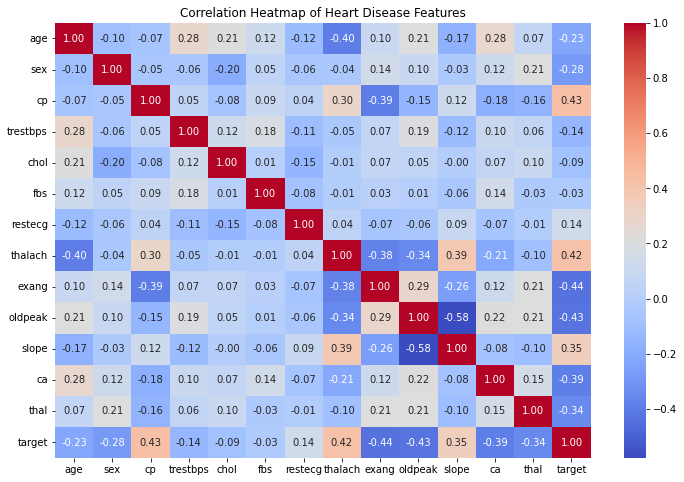

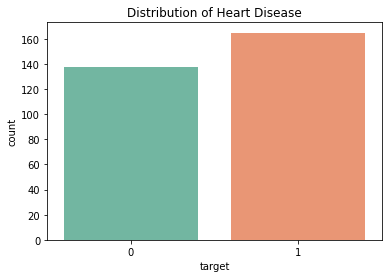

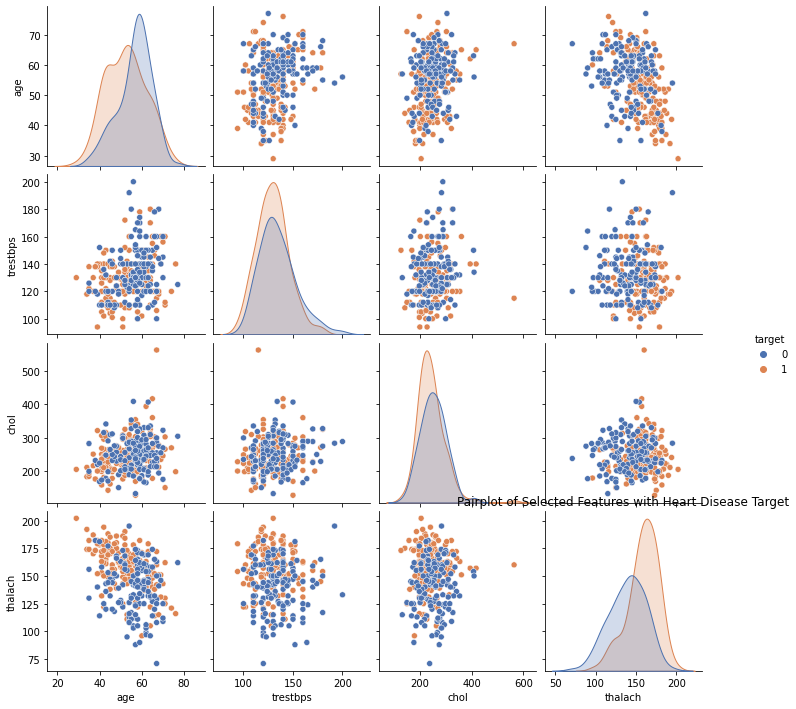

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease Features')
plt.show()

# Distribution of target variable
sns.countplot(x='target', data=heart_df, palette='Set2')
plt.title('Distribution of Heart Disease')
plt.show()

# Pairplot for selected features
sns.pairplot(heart_df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette='deep')
plt.title('Pairplot of Selected Features with Heart Disease Target')
plt.show()

## Split the Data and Scale
- The train_test_split function splits the dataset into training (80%) and testing (20%) subsets, ensuring that our model can be evaluated on unseen data.

- Features and target

In [5]:
X = heart_df.drop(columns='target')
y = heart_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for Gradient Boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the Gradient Boosting Model
- Here, we create an instance of the Gradient Boosting classifier and fit it to the training data.
- Gradient Boosting is an ensemble method that combines multiple weak learners (decision trees) to improve accuracy.

- Create a Gradient Boosting classifier

In [17]:
gb_model = GradientBoostingClassifier(n_estimators=1000,min_samples_split=10, 
                                      learning_rate=0.001, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.001, min_samples_split=10,
                           n_estimators=1000, random_state=42)

## Make Predictions and Evaluate the Model
- The predict method generates predictions for the test data based on the model trained in the previous step.
- The confusion matrix shows the number of true vs. predicted classifications, allowing us to see where the model makes mistakes.
- The classification report includes precision, recall, and F1-score, providing a comprehensive view of the model's performance.
- Evaluate the model on training data


In [18]:
y_train_pred = gb_model.predict(X_train_scaled)
y_test_pred = gb_model.predict(X_test_scaled)

In [19]:
## Evaluate the Model
print("Confusion Matrix: Train Data")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Train Data):")
print(classification_report(y_train, y_train_pred))
print("============================================================================")

# Evaluate the model on test data
print("Confusion Matrix: Test Data")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Confusion Matrix: Train Data
[[ 86  23]
 [  6 127]]

Classification Report (Train Data):
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       109
           1       0.85      0.95      0.90       133

    accuracy                           0.88       242
   macro avg       0.89      0.87      0.88       242
weighted avg       0.89      0.88      0.88       242

Confusion Matrix: Test Data
[[24  5]
 [ 4 28]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Feature Importance
- Gradient Boosting provides insights into feature importance, indicating which features contribute most to the model's predictions.

- Plot feature importances

Feature ranking:
ca: 0.1776
cp: 0.1722
thal: 0.1404
oldpeak: 0.1196
age: 0.0915
chol: 0.0640
slope: 0.0565
exang: 0.0563
trestbps: 0.0420
sex: 0.0398
thalach: 0.0312
fbs: 0.0066
restecg: 0.0021


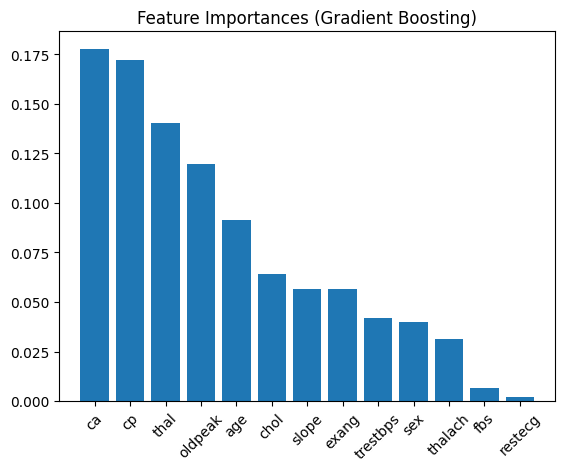

In [13]:
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

#- Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{heart_df.columns[indices[f]]}: {importances[indices[f]]:.4f}")

#- Plot the feature importances
plt.figure()
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(heart_df.columns)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()